# This is where we use the Algorithms

In [7]:
# TODO: Write a guide on what you need, https://anaconda.org/anaconda/gensim <---- Gensim
#       What does the error message mean?

import pandas as pd              # pandas is a dataframe library
import matplotlib.pyplot as plt  # matplotlib.pyplot plots data
import numpy as np               # numpy provides N-dim object support

# do ploting inline instead of in a separate window
%matplotlib inline

### Algorithms ###
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.cross_validation import train_test_split # Used to split data into Training set and Test Set

## Loading Files

In [2]:
# Load the post data
df = pd.read_csv("../LogisticsSimulation/alteredData.csv")
#df = pd.read_csv("../alteredData10k.csv")
#df = pd.read_csv("../alteredData100k.csv")
#df = pd.read_csv("../alteredData1M.csv")
#df1 = pd.read_csv("../data.csv")

## Preprocessing with a Custom Dummy Encoding

In [3]:
# http://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python <--- This is dank stuff

#TODO:
# Concider changing this to Word Embedding instead (Gensim)
# Concider to add new information instead of re-reading everything
# Should be saved into three different file?

#from sklearn.feature_extraction import DictVectorizer
#dictVector = DictVectorizer(sparse = False, sort = False)
#qualitative_features = ['Name', 'Street', 'City']
#X_qual = dictVector.fit_transform(df[qualitative_features].to_dict('records'))
# Print the List
#dictVector.vocabulary_

In [4]:
# Sanity Check
#df.ix[[0, 33, 39, 55]]

In [5]:
# Debug #
#df.loc[df['Name'] == 7]
#df1.head()

In [6]:
#df.head()

In [7]:
# Change all missing values to 'missing'

df['Name']     = df['Name'].fillna('missing')
df['SurName']  = df['SurName'].fillna('missing')
df['Street']   = df['Street'].fillna('missing')
df['StreetNr'] = df['StreetNr'].fillna(-1)
df['ZipCode']  = df['ZipCode'].fillna(-1)
df['City']     = df['City'].fillna('missing')
df.loc[df['Legitimate'] == False]

,Name,SurName,Street,StreetNr,ZipCode,City,Legitimate
4,Wilbert,Chavous,Agnesgatan,32,-1.0,Halmstad,False
9,Linsey,Jacoby,missing,1,25146.0,Helsingborg,False
11,Velva,Tarbox,Aktergatan,98,2112.0,Malmo,False
17,Lauralee,Selle,missing,40,90147.0,Umea,False


In [8]:
#Check for null values
df.isnull().values.any()

False

In [9]:
# Shows the RowsxColumns
df.shape

(20, 7)

In [10]:
# This is a simple encoder which replaces Strings with a number

# TODO:
# Should save the corresponding number to the corresponding string in a file

# Thanks to Wboy, for the Dummy Encoding function, http://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

from sklearn.preprocessing import LabelEncoder

def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+ feature)
        return df
    
dummyEncode(df)


# Chane True/False to 1/0
correctAdress = {True : 1, False : 0}
df['Legitimate'] = df['Legitimate'].map(correctAdress)

df.select_dtypes

df.head()

,Name,SurName,Street,StreetNr,ZipCode,City,Legitimate
0,4,12,7,152,25136.0,3,1
1,11,8,14,137,65133.0,5,1
2,7,4,4,188,55157.0,4,1
3,6,1,2,124,97175.0,6,1
4,17,3,0,32,-1.0,2,0


### Check True/False Ratio

In [11]:
num_true = len(df.loc[df['Legitimate'] == True])
num_false = len(df.loc[df['Legitimate'] == False])

print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true / (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false / (num_true + num_false)) * 100))

Number of True cases: 16 (80.00%)
Number of False cases: 4 (20.00%)


### Split Data

In [12]:
# Divides the Train data and Test data into a 70/30 split

#X_train = pd.get_dummies(df)
#X_test = pd.get_dummies(df)

feature_col_names = ['Name', 'SurName', 'City', 'Street', 'StreetNr', 'ZipCode']
prediction_class_name = ['Legitimate']

#ddf = pd.get_dummies(df)

X = df[feature_col_names].values     # predictor feature columnd (8 X m)
y = df[prediction_class_name].values # predicted calss (1 = true, 0 = false) column (1 X m)
split_test_size = 0.90

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42) # 42 is the answer to everything

In [13]:
#Print to check if the split was to our liking

print("{0:0.2f}% in training set".format((len(X_train) / len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test) / len(df.index)) * 100))

10.00% in training set
90.00% in test set


### Verifying predicted value was split correctly

In [14]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Legitimate'] == 1]), len(df.loc[df['Legitimate'] == 1]) / len(df.index) * 100))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Legitimate'] == 0]), len(df.loc[df['Legitimate'] == 0]) / len(df.index) * 100))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), len(y_train[y_train[:] == 1]) / len(y_train) * 100))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), len(y_train[y_train[:] == 0]) / len(y_train) * 100))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), len(y_test[y_test[:] == 1]) / len(y_test) * 100))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), len(y_test[y_test[:] == 0]) / len(y_test) * 100))

Original True  : 16 (80.00%)
Original False : 4 (20.00%)

Training True  : 2 (100.00%)
Training False : 0 (0.00%)

Test True      : 14 (77.78%)
Test False     : 4 (22.22%)


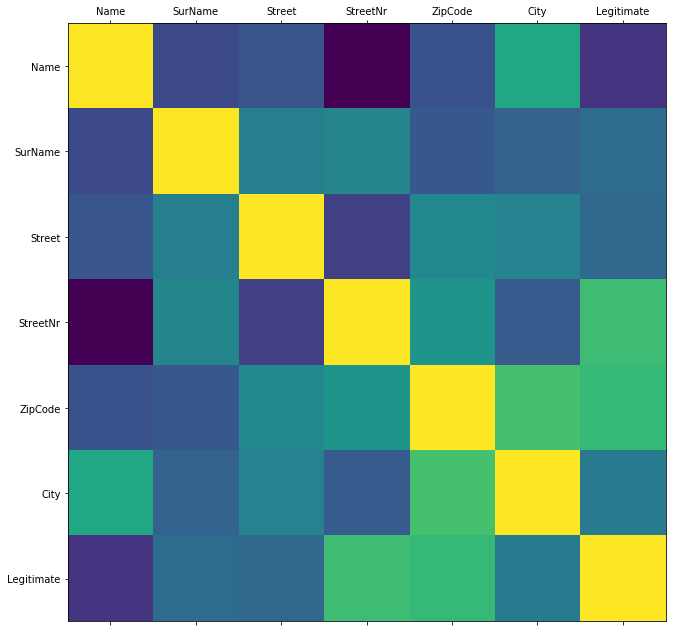

In [15]:
def plot_corr(df, size=11):
    # data frame correlation function
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    
    # color code the rectangles by correlation value
    ax.matshow(corr)
    
    # draw x tick marks
    plt.xticks(range(len(corr.columns)), corr.columns)
    # draw y tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(df)

In [16]:
df.corr()

,Name,SurName,Street,StreetNr,ZipCode,City,Legitimate
Name,1.000000,-0.216435,-0.154012,-0.571947,-0.173493,0.370584,-0.328695
SurName,-0.216435,1.000000,0.108961,0.143759,-0.138583,-0.076873,-0.018194
Street,-0.154012,0.108961,1.000000,-0.273454,0.160606,0.127390,-0.046306
StreetNr,-0.571947,0.143759,-0.273454,1.000000,0.242133,-0.118916,0.510586
ZipCode,-0.173493,-0.138583,0.160606,0.242133,1.000000,0.543955,0.481604
City,0.370584,-0.076873,0.127390,-0.118916,0.543955,1.000000,0.082847
Legitimate,-0.328695,-0.018194,-0.046306,0.510586,0.481604,0.082847,1.000000


## Random Forest Test

In [17]:
from sklearn import metrics

rf_model = RandomForestClassifier(random_state = 42) # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [18]:
rf_predict_train = rf_model.predict(X_train)

# training metrics
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy 1.0000


In [19]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy 0.7778


In [20]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels = [1, 0]))


#[[True-Positive, False-Negative]
#[False-Positive, True-Negative]]

Confusion Matrix
[[14  0]
 [ 4  0]]

Classification Report
             precision    recall  f1-score   support

          1       0.78      1.00      0.88        14
          0       0.00      0.00      0.00         4

avg / total       0.60      0.78      0.68        18



C:\Users\vikander\AppData\Local\Continuum\Anaconda33\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Naive Bayers

In [21]:
from sklearn.preprocessing import Imputer

fill_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

X_train = fill_0.fit_transform(X_train)
X_test  = fill_0.fit_transform(X_test)

In [22]:
# Training Bayers

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In [23]:
# Performance on Training Data
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

#Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 1.0000



In [24]:
# predict values using the training data
nb_predict_test = nb_model.predict(X_test)

# trainint metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.7778



In [25]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[14  0]
 [ 4  0]]

Classification Report
             precision    recall  f1-score   support

          1       0.78      1.00      0.88        14
          0       0.00      0.00      0.00         4

avg / total       0.60      0.78      0.68        18



C:\Users\vikander\AppData\Local\Continuum\Anaconda33\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Logistic Regression

In [26]:
lr_model = LogisticRegression(C = 0.7, random_state = 42)
lr_model.fit(X_train, y_train.ravel())

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
lr_predict_train = lr_model.predict(X_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))
print("")

In [ ]:
lr_predict_test = lr_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("")

In [ ]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels = [1, 0]))

### Logistic CV

In [ ]:
lr_cv_model = LogisticRegressionCV(n_jobs = -1, random_state = 42, Cs = 3, cv = 10, refit = True)
lr_cv_model.fit(X_train, y_train.ravel())

In [ ]:
lr_cv_predict_train = lr_cv_model.predict(X_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))
print("")

In [ ]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print("")

In [1]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels = [1, 0]))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels = [1, 0]))

Confusion Matrix


NameError: name 'metrics' is not defined

In [11]:
dfd = pd.read_csv("../LogisticsSimulation/DataFame10kEncoded")

In [12]:
dfd.head()

,Name,SurName,Street,StreetNr,ZipCode,City,Legitimate,StartStreet,StartStreetNr,StartZipCode,StartCity,EndStreet,EndStreetNr,EndZipCode,EndCity,CorrectDelivery
0,93.0,8.0,3,170,70165,4.0,1,24,1,11222,7,24,1,70222,4.0,1
1,69.0,68.0,4,66,25133,17.0,1,24,1,11222,7,24,1,25222,17.0,1
2,95.0,95.0,2,115,50157,14.0,1,24,1,11222,7,24,1,60222,14.0,1
3,7.0,7.0,38,147,75113,0.0,1,24,1,11222,7,24,1,25222,0.0,1
4,50.0,49.0,22,147,90125,15.0,1,24,1,11222,7,24,1,90222,15.0,1


In [6]:
print(len(dfd.index))

16
